<a href="https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/Swin2SR/Perform_image_super_resolution_with_Swin2SR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set-up environment

Let's first install 🤗 Transformers.

In [13]:
!pip install -q git+https://github.com/huggingface/transformers.git

## Load model

Next, we load the Swin2SR model from the [hub](https://huggingface.co/models?other=swin2sr). There are several available, here we load the one that upscales x2.

In [14]:
from transformers import Swin2SRForImageSuperResolution

model = Swin2SRForImageSuperResolution.from_pretrained("caidas/swin2SR-classical-sr-x2-64")

## Load image

Let's load an image on which we'd like to test the model.

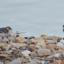

In [15]:
import requests
from PIL import Image

url = "https://huggingface.co/spaces/jjourney1125/swin2sr/resolve/main/samples/butterfly.jpg"

# image = Image.open(requests.get(url, stream=True).raw)
image = Image.open("test/TEST_00004.jpg")
image

## Prepare image using ImageProcessor

In [16]:
from transformers import Swin2SRImageProcessor 

processor = Swin2SRImageProcessor()

In [17]:
pixel_values = processor(image, return_tensors="pt").pixel_values
print(pixel_values.shape)

torch.Size([1, 3, 72, 72])


## Forward pass

In [18]:
import torch

with torch.no_grad():
  outputs = model(pixel_values)

## Visualize

The model outputs an upscaled version of our input image.

In [19]:
outputs.reconstruction.shape

torch.Size([1, 3, 144, 144])

Let's visualize it!

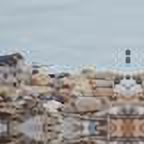

In [20]:
import numpy as np

output = outputs.reconstruction.data.squeeze().float().cpu().clamp_(0, 1).numpy()
output = np.moveaxis(output, source=0, destination=-1)
output = (output * 255.0).round().astype(np.uint8)  # float32 to uint8
Image.fromarray(output)